<h1 align="center">KRX Big-Data</h1>

# [ 1 ] Overview

### 1. Sources

 - `[유가증권]일별 시세정보(주문번호-1300-27)` : 2020년 1분기 주식 정보 -> _CSV 형식_
 - `[유가증권]일별 시세정보(주문번호-1300-30)` : 2021년 1분기 주식 정보 -> _CSV 형식_
 - `[유가증권]일별 시세정보(주문번호-1300-33)` : 2022년 1분기 주식 정보 -> _CSV 형식_

<br><br><br>

### 2. Targets from `.CSV` files (Input)

| 항목 명 | 항목 영어명 |
|:---:|:---:|
|`거래일자`|TRD_DD|
|`종목코드`|ISU_CD|
|`종목명`|ISU_NM|
|`시가`|OPNPRC|
|`고가`|HGPRC|
|`저가`|LWPRC|
|`종가`|CLSPRC|
|(누적)`거래량`|ACC_TRDVOL|
|`업종구분`(지수업종코드)|IDX_IND_CD|
|`PER`(주가수익률)|PER|
|`상장일`|LIST_DD|
|`시가총액`|MKTCAP|

<br><br><br>

### 3. Results (Output)

| Property | Description |
|:---:|:---:|
|TRD_DD|`거래일자`|
|ISU_CD|`종목코드`|
|ISU_NM|`종목명`|
|OPNPRC|`시가`|
|HGPRC|`고가`|
|LWPRC|`저가`|
|CLSPRC|`종가`|
|ACC_TRDVOL|(누적)`거래량`|
|IDX_IND_CD|`업종구분`(지수업종코드)|
|PER|`PER`(주가수익률)|
|LIST_DD|`상장일`|
|MKTCAP|`시가총액`|

<br><br><br><hr>

# [ 2 ] Importing Modules

In [378]:
# Data Handlers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Code Libraries
import os
import copy
import abc

<br><br><br>

# [ 3 ] Declarations

In [379]:
import copy

############################################################################################################

class Utils:
    """
    데이터 처리를 위해 유용한 기능들을 정의한 클래스입니다.
    """
    @staticmethod
    def generate_int_range(start:int, end:int)->iter:
        """
        start와 end 사이의 정수들을 반환하는 Generator입니다.
        """
        if(start >= end):
            raise SyntaxError(f"{start} must be larger than {end}")
        while start <= end:
            yield start
            start += 1
            
    """
    깊은 복사를 한 인스턴스를 반환합니다.
    """
    @staticmethod
    def clone(target:object)->object:
        return copy.deepcopy(target)
    
            
############################################################################################################

import pandas

class PandasBasedCSVHandler:
    """
    Pandas 모듈을 기반으로 CSV 파일 데이터를 다루는 클래스입니다.
    """
    def __init__(self, handler:pandas)->None:
        self.__handler = handler
        self.__data = dict()
        
    @property
    def handler(self)->pandas:
        """
        주입받은 Pandas 객체를 반환합니다.
        이미 생성된 handler 인스턴스는 대체될 수 없고 반환만 가능합니다.
        """
        return self.__handler
    
    def take_data_from_CSV_file(self, *, data_id:object, filepath:str, encoding:str="utf-8")->object:
        """
        불러올 CSV 파일의 경로를 받아 데이터를 가져오고
        데이터를 식별할 data_id를 받습니다.
        Argument를 반드시 키워드로 명시하여 Parameter에 전달해야 합니다.
        """
        self.__data[data_id] = self.__handler.read_csv(filepath, encoding=encoding)
        return self
    
    def get_CSV_data(self)->dict:
        """
        다음 Dictionary 자료구조를 반환합니다.
        key의 타입(자료형)은 정수형으로 의도되었지만 어떤 타입이 들어올지는 자유입니다.
        value는 Pandas 타입의 객체입니다.
        """
        return self.__data
    
    def validate(self, target_properties:list)->object:
        """
        모든 Pandas 데이터가 target_properties에 명시된 속성을 가지고 있는지 확인합니다.
        만일, 속성이 매칭되지 않으면 예외가 발생할 것입니다.
        모든 과정이 성공하면 True를 반환합니다.
        """
        for data_key, _ in self.__data.items():
            self.__data[data_key][target_properties]
        return True

############################################################################################################

class KRXStockData:
    pass

############################################################################################################

class DataVisualization:
    pass

############################################################################################################

<br><br><br>

# [ 4 ] Stock Predictions

## 01. 데이터 수집 및 전처리 단계

### (1) 데이터 경로 및 이름 설정

In [380]:
# CSV 파일 루트 경로
root_dir:str = os.path.join(".", "data\\주식")

# CSV 파일 전체 경로 및 이름 형식
filepath_form:str = os.path.join(root_dir, "{0}","{0}_{1}.csv")

# 각 CSV 파일들을 가져오기 위한 프로파일 list<dict[]>
csv_file_profiles : list = [
    {
        "name" : "[유가증권]일별 시세정보(주문번호-1300-27)",
        "date_range" : [202001, 202003]
    },
    {
        "name" : "[유가증권]일별 시세정보(주문번호-1300-30)",
        "date_range" : [202101, 202103]
    },
    {
        "name" : "[유가증권]일별 시세정보(주문번호-1300-33)",
        "date_range" : [202201, 202203]
    }
]

# 데이터 전처리에 필요한 속성들
selected_properties = ["거래일자","종목코드","종목명", "시가", "고가", "저가", "종가", "거래량", "업종구분", "PER", "상장일", "시가총액"]

### (2) CSV 파일 데이터 불러오기

In [381]:
# class<PandasBasedCSVHandler> 인스턴스 생성
csv_handler:PandasBasedCSVHandler = PandasBasedCSVHandler(pd)

In [382]:
# CSV 프로파일 기반으로 class<PandasBasedCSVHandler> 인스턴스에 데이터 병합
for csv_file_info in csv_file_profiles: # 프로파일 요소 기반 iteration 작업
    for date_num in Utils.generate_int_range(csv_file_info["date_range"][0], csv_file_info["date_range"][1]): # Iterator 생성
        csv_handler.take_data_from_CSV_file(
            data_id = date_num, # Year + Month 형식의 정수
            filepath = filepath_form.format(csv_file_info["name"], date_num), # 폴더를 포함한 전체 경로의 파일명
            encoding="cp949" # 파일 인코딩 명시
        )

### (3) 데이터 속성 검증하기

In [383]:
# 검증할 속성 내용들은 [1. 데이터 경로 및 이름 설정]의 selected_properties 변수 참고
csv_handler.validate(selected_properties)

True

#### - 핸들러(Hander)에 저장된 CSV 데이터 형식

```js
{
    202001 : Pandas,
    202002 : Pandas,
    202003 : Pandas,
    202101 : Pandas,
    202102 : Pandas,
    202103 : Pandas,
    202201 : Pandas,
    202202 : Pandas,
    202203 : Pandas
}
```

In [384]:

csv_handler.get_CSV_data()[202001][selected_properties]

,거래일자,종목코드,종목명,시가,고가,저가,종가,거래량,업종구분,PER,상장일,시가총액
0,20200102,KR7000020008,동화약품보통주,8340,8400,8290,8400,111305,의약품 제조업,23.01,19760324,234624348000
1,20200103,KR7000020008,동화약품보통주,8400,8450,8290,8360,96437,의약품 제조업,22.9,19760324,233507089200
2,20200106,KR7000020008,동화약품보통주,8290,8330,8120,8180,73230,의약품 제조업,22.41,19760324,228479424600
3,20200107,KR7000020008,동화약품보통주,8200,8280,8090,8160,117904,의약품 제조업,22.36,19760324,227920795200
4,20200108,KR7000020008,동화약품보통주,8170,8170,7830,7930,263246,의약품 제조업,21.73,19760324,221496557100
...,...,...,...,...,...,...,...,...,...,...,...,...
18322,20200123,KYG5307W1015,엘브이엠씨홀딩스보통주,4220,4325,4200,4290,178258,자동차 판매업,-,20101130,219306683310
18323,20200128,KYG5307W1015,엘브이엠씨홀딩스보통주,4050,4200,3740,4095,348080,자동차 판매업,-,20101130,209338197705
18324,20200129,KYG5307W1015,엘브이엠씨홀딩스보통주,4095,4180,4095,4105,104726,자동차 판매업,-,20101130,209849402095
18325,20200130,KYG5307W1015,엘브이엠씨홀딩스보통주,4100,4145,3985,4050,145074,자동차 판매업,-,20101130,207037777950


### (4) 

#### KRX 종목을 기준으로 데이터 분리

```js
```

In [385]:
csv_data = csv_handler.get_CSV_data()
csv_data[202002]

,거래일자,시장ID,종목코드,종목명,시가,고가,저가,종가,거래량,거래대금,...,주문량기준취소율,종목별거래횟수기준매수매도불균형,종목별거래량기준매수매도불균형,주문횟수기준주문불균형,주문량기준주문불균형,평균호가스프레드,평균비율스프레드,평균유효스프레드,평균실현스프레드,HS 역선택비용
0,20200203,STK,KR7000020008,동화약품보통주,7790,7840,7370,7530,394550,2967584650,...,0.352018,0.380111,0.436301,1.402451,0.859184,14.635436,0.192036,17.111547,0.303962,16.807585
1,20200204,STK,KR7000020008,동화약품보통주,7550,7640,7530,7600,87815,666582090,...,0.367710,0.660454,0.487321,0.889005,0.950656,12.786766,0.170271,13.298217,6.397621,6.900596
2,20200205,STK,KR7000020008,동화약품보통주,7640,7770,7630,7680,120557,925304910,...,0.383564,0.508726,0.434874,0.945687,0.911906,12.402631,0.168878,15.636998,-2.842870,18.479868
3,20200206,STK,KR7000020008,동화약품보통주,7750,7890,7690,7750,116790,909542280,...,0.353751,0.433333,0.462323,1.338227,1.023081,16.000567,0.181895,18.468254,7.411765,11.056489
4,20200207,STK,KR7000020008,동화약품보통주,7750,7790,7580,7670,182278,1399518850,...,0.319877,0.323601,0.317865,1.582620,0.779785,18.445407,0.243364,29.355231,16.950221,12.405010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18324,20200224,STK,KYG5307W1015,엘브이엠씨홀딩스보통주,4835,5070,4770,5070,435177,2138539185,...,0.175747,0.523097,0.572139,1.992132,1.014681,13.430841,0.229276,12.694611,-4.667135,17.361746
18325,20200225,STK,KYG5307W1015,엘브이엠씨홀딩스보통주,5080,5150,4970,5070,234995,1189625830,...,0.207188,0.530172,0.462496,0.954404,0.894499,17.561368,0.247898,13.300493,-2.688278,15.988771
18326,20200226,STK,KYG5307W1015,엘브이엠씨홀딩스보통주,5050,5130,4980,5040,217641,1099346705,...,0.165647,0.375212,0.297810,1.407659,0.767952,13.510749,0.270839,16.419205,7.811951,8.607254
18327,20200227,STK,KYG5307W1015,엘브이엠씨홀딩스보통주,5000,5110,4850,4940,279812,1396515140,...,0.216348,0.354447,0.210917,1.103750,0.712317,21.297175,0.262642,13.877159,-1.620339,15.497498


In [386]:
for _, data_value in csv_data.items():
    selected_df = data_value[selected_properties]
    corps_id = selected_df[["종목코드","종목명"]].drop_duplicates()
    print(id(selected_df), id(corps_id))
    break
    
indicator = Utils.clone(selected_df)

1706070422336 1705848943520


In [387]:
indicator.tail()

,거래일자,종목코드,종목명,시가,고가,저가,종가,거래량,업종구분,PER,상장일,시가총액
18322,20200123,KYG5307W1015,엘브이엠씨홀딩스보통주,4220,4325,4200,4290,178258,자동차 판매업,-,20101130,219306683310
18323,20200128,KYG5307W1015,엘브이엠씨홀딩스보통주,4050,4200,3740,4095,348080,자동차 판매업,-,20101130,209338197705
18324,20200129,KYG5307W1015,엘브이엠씨홀딩스보통주,4095,4180,4095,4105,104726,자동차 판매업,-,20101130,209849402095
18325,20200130,KYG5307W1015,엘브이엠씨홀딩스보통주,4100,4145,3985,4050,145074,자동차 판매업,-,20101130,207037777950
18326,20200131,KYG5307W1015,엘브이엠씨홀딩스보통주,4000,4250,4000,4085,193650,자동차 판매업,-,20101130,208826993315


In [388]:
import datetime
pd.to_datetime(indicator["거래일자"].astype('str'))

0       2020-01-02
1       2020-01-03
2       2020-01-06
3       2020-01-07
4       2020-01-08
           ...    
18322   2020-01-23
18323   2020-01-28
18324   2020-01-29
18325   2020-01-30
18326   2020-01-31
Name: 거래일자, Length: 18327, dtype: datetime64[ns]

In [389]:
indicator.loc[indicator["종목코드"] == "KR7000020008"]

,거래일자,종목코드,종목명,시가,고가,저가,종가,거래량,업종구분,PER,상장일,시가총액
0,20200102,KR7000020008,동화약품보통주,8340,8400,8290,8400,111305,의약품 제조업,23.01,19760324,234624348000
1,20200103,KR7000020008,동화약품보통주,8400,8450,8290,8360,96437,의약품 제조업,22.9,19760324,233507089200
2,20200106,KR7000020008,동화약품보통주,8290,8330,8120,8180,73230,의약품 제조업,22.41,19760324,228479424600
3,20200107,KR7000020008,동화약품보통주,8200,8280,8090,8160,117904,의약품 제조업,22.36,19760324,227920795200
4,20200108,KR7000020008,동화약품보통주,8170,8170,7830,7930,263246,의약품 제조업,21.73,19760324,221496557100
5,20200109,KR7000020008,동화약품보통주,8020,8060,7900,7900,50346,의약품 제조업,21.64,19760324,220658613000
6,20200110,KR7000020008,동화약품보통주,7970,8140,7880,8100,77059,의약품 제조업,22.19,19760324,226244907000
7,20200113,KR7000020008,동화약품보통주,8140,8250,8070,8220,91646,의약품 제조업,22.52,19760324,229596683400
8,20200114,KR7000020008,동화약품보통주,8240,8240,8070,8140,100901,의약품 제조업,22.3,19760324,227362165800
9,20200115,KR7000020008,동화약품보통주,8160,8170,8000,8090,72255,의약품 제조업,22.16,19760324,225965592300


<hr><hr><hr><hr><hr><hr><hr><hr><hr><hr><hr>

In [390]:
import random
import datetime

start_date = datetime.datetime.strptime(str(20210406), '%Y%m%d') 

def randomly(start=0, end=100):
    for _ in range(30):
        yield random.randrange(start, end)

raw_data = {
            'Date': [start_date.date() + datetime.timedelta(i) for i in range(30)],
            'Open': list(randomly()),
            'High': list(randomly()),
            'Low': list(randomly()),
            'Close': list(randomly()),
            'Volume': list(randomly(start=1000, end=10000))
           }

raw_df = pd.DataFrame(raw_data)

In [391]:
raw_df.tail()

,Date,Open,High,Low,Close,Volume
25,2021-05-01,93,91,1,25,4149
26,2021-05-02,49,45,51,40,5515
27,2021-05-03,95,18,60,64,3347
28,2021-05-04,90,18,17,15,4689
29,2021-05-05,61,15,73,82,5280


In [392]:
start_date = datetime.datetime.strptime(str(20210506), '%Y%m%d') 

raw_data2 = {
            'Date': [start_date.date() + datetime.timedelta(i) for i in range(30)],
            'Open': list(randomly()),
            'High': list(randomly()),
            'Low': list(randomly()),
            'Close': list(randomly()),
            'Volume': list(randomly(start=1000, end=10000))
           }

raw_df2 = pd.DataFrame(raw_data2)

In [393]:
raw_df2.head()

,Date,Open,High,Low,Close,Volume
0,2021-05-06,73,21,11,62,9505
1,2021-05-07,13,98,56,26,9517
2,2021-05-08,13,19,92,75,2418
3,2021-05-09,38,84,40,1,2752
4,2021-05-10,38,63,9,99,3295


In [394]:
concated = pd.concat([raw_df, raw_df2], ignore_index=True)

In [395]:
a = concated[["Date","Close"]]

In [396]:
print(id(concated), id(a))

1705487917408 1705487918992


In [397]:
import pandas
import numpy

class StockAnalyzer:
    """
    주식 분석에 필요한 계산 및 분석을 위한 클래스입니다.
    모든 함수들은 모듈 pandas에 대한 의존성을 가집니다.
    """
    @staticmethod
    def RSI_calculation(values)->float:
        """
        Calculation of Relative Strength Index (RSI)     
        Avg(PriceUp)/(Avg(PriceUP)+Avg(PriceDown)*100
        Where: PriceUp(t)=1*(Price(t)-Price(t-1)){Price(t)- Price(t-1)>0};
               PriceDown(t)=-1*(Price(t)-Price(t-1)){Price(t)- Price(t-1)<0};
        """
        up = values[values>0].mean()
        down = -1*values[values<0].mean()
        return 100 * up / (up + down)
    
    # as_of_property 수정 필요
    @staticmethod
    def add_Momentum_1D(ins_ref:pandas, as_of_property:str)->pandas:
        """
        Add Momentum_1D column for all 15 stocks.
        Momentum_1D = P(t) - P(t-1)
        """
        ins_ref['Momentum_1D'] = (ins_ref[as_of_property]-ins_ref[as_of_property].shift(1)).fillna(0)
        return ins_ref
    
    @staticmethod
    def add_RSI_14D(ins_ref:pandas)->pandas:
        """
        Calculation of Relative Strength Index (RSI)
        """
        ins_ref['RSI_14D'] = ins_ref['Momentum_1D'].rolling(center=False, window=14).apply(StockAnalyzer.RSI_calculation).fillna(0)
        return ins_ref
        
    @staticmethod
    def bollinger_bands_calculation(price:int, length:int=30, numsd:int=2)->float:
        """ 
        Calculation of Bollinger Bands
        returns average, upper band, and lower band
        """
        ave = price.rolling(window = length, center = False).mean()
        sd = price.rolling(window = length, center = False).std()
        upband = ave + (sd*numsd)
        dnband = ave - (sd*numsd)
        print(type(numpy.round(ave,3)), type(numpy.round(upband,3)), type(numpy.round(dnband,3)))
        return numpy.round(ave,3), numpy.round(upband,3), numpy.round(dnband,3)
        
    # as_of_property 수정 필요
    @staticmethod
    def add_BB_Band(ins_ref:pandas, as_of_property:str)->pandas:
        ins_ref['BB_Middle_Band'], ins_ref['BB_Upper_Band'], ins_ref['BB_Lower_Band'] = StockAnalyzer.bollinger_bands_calculation(ins_ref[as_of_property], length=20, numsd=1)
        ins_ref['BB_Middle_Band'] = ins_ref['BB_Middle_Band'].fillna(0)
        ins_ref['BB_Upper_Band'] = ins_ref['BB_Upper_Band'].fillna(0)
        ins_ref['BB_Lower_Band'] = ins_ref['BB_Lower_Band'].fillna(0)
        return ins_ref

    # Date, High, Low 수정 필요
    @staticmethod
    def aroon_oscillator_calculation(df, tf=25):  
        """
        Calculation of Aroon Oscillator
        return type of tuple<list<float>>
        """
        aroonup = []
        aroondown = []
        x = tf
        while x < len(df['Date']):
            aroon_up = ((df['High'][x-tf:x].tolist().index(max(df['High'][x-tf:x])))/float(tf))*100
            aroon_down = ((df['Low'][x-tf:x].tolist().index(min(df['Low'][x-tf:x])))/float(tf))*100
            aroonup.append(aroon_up)
            aroondown.append(aroon_down)
            x+=1
        return aroonup, aroondown
    
    @staticmethod
    def add_aroon_oscillator(ins_ref:pandas)->pandas:
        """
        """
        list_of_zeros = [0] * 25
        up, down = StockAnalyzer.aroon_oscillator_calculation(ins_ref)
        aroon_list = [x - y for x, y in zip(up,down)]
        if len(aroon_list) == 0:
            aroon_list = [0] * ins_ref.shape[0]
            ins_ref['Aroon_Oscillator'] = aroon_list
        else:
            ins_ref['Aroon_Oscillator'] = list_of_zeros + aroon_list
        return ins_ref

    # Close, Volume 수정 필요
    @staticmethod
    def add_PVT(ins_ref:pandas)->pandas:
        """
        Calculation of Price Volume Trend
        PVT = [((CurrentClose - PreviousClose) / PreviousClose) x Volume] + PreviousPVT
        """
        ins_ref["PVT"] = (ins_ref['Momentum_1D']/ ins_ref['Close'].shift(1)) * ins_ref['Volume']
        ins_ref["PVT"] = ins_ref["PVT"] - ins_ref["PVT"].shift(1)
        ins_ref["PVT"] = ins_ref["PVT"].fillna(0)
        return ins_ref
    
    # Close, High, Low 수정필요
    @staticmethod
    def add_AB_Band(ins_ref:pandas)->pandas:
        """
        Calculation of Acceleration Bands
        """
        #ins_ref['AB_Middle_Band'] = pd.rolling_mean(df['Close'], 20)
        ins_ref['AB_Middle_Band'] = ins_ref['Close'].rolling(window = 20, center=False).mean()
        # High * ( 1 + 4 * (High - Low) / (High + Low))
        ins_ref['aupband'] = ins_ref['High'] * (1 + 4 * (ins_ref['High']-ins_ref['Low'])/(ins_ref['High']+ins_ref['Low']))
        ins_ref['AB_Upper_Band'] = ins_ref['aupband'].rolling(window=20, center=False).mean()
        # Low *(1 - 4 * (High - Low)/ (High + Low))
        ins_ref['adownband'] = ins_ref['Low'] * (1 - 4 * (ins_ref['High']-ins_ref['Low'])/(ins_ref['High']+ins_ref['Low']))
        ins_ref['AB_Lower_Band'] = ins_ref['adownband'].rolling(window=20, center=False).mean()
        ins_ref = ins_ref.fillna(0)
        return ins_ref

In [398]:
StockAnalyzer.add_Momentum_1D(raw_df, "Close")
StockAnalyzer.add_RSI_14D(raw_df).tail(5)

,Date,Open,High,Low,Close,Volume,Momentum_1D,RSI_14D
25,2021-05-01,93,91,1,25,4149,-51.0,44.578313
26,2021-05-02,49,45,51,40,5515,15.0,41.120000
27,2021-05-03,95,18,60,64,3347,24.0,39.672131
28,2021-05-04,90,18,17,15,4689,-49.0,41.965318
29,2021-05-05,61,15,73,82,5280,67.0,45.905172


In [399]:
StockAnalyzer.add_BB_Band(raw_df, "Close").tail(5)

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


,Date,Open,High,Low,Close,Volume,Momentum_1D,RSI_14D,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band
25,2021-05-01,93,91,1,25,4149,-51.0,44.578313,46.45,74.982,17.918
26,2021-05-02,49,45,51,40,5515,15.0,41.120000,44.20,71.268,17.132
27,2021-05-03,95,18,60,64,3347,24.0,39.672131,46.20,73.175,19.225
28,2021-05-04,90,18,17,15,4689,-49.0,41.965318,43.85,71.417,16.283
29,2021-05-05,61,15,73,82,5280,67.0,45.905172,46.80,75.163,18.437


In [400]:
StockAnalyzer.add_aroon_oscillator(raw_df).tail()

,Date,Open,High,Low,Close,Volume,Momentum_1D,RSI_14D,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator
25,2021-05-01,93,91,1,25,4149,-51.0,44.578313,46.45,74.982,17.918,16.0
26,2021-05-02,49,45,51,40,5515,15.0,41.120000,44.20,71.268,17.132,16.0
27,2021-05-03,95,18,60,64,3347,24.0,39.672131,46.20,73.175,19.225,16.0
28,2021-05-04,90,18,17,15,4689,-49.0,41.965318,43.85,71.417,16.283,-76.0
29,2021-05-05,61,15,73,82,5280,67.0,45.905172,46.80,75.163,18.437,-76.0


In [401]:
StockAnalyzer.add_PVT(raw_df).tail()

,Date,Open,High,Low,Close,Volume,Momentum_1D,RSI_14D,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,PVT
25,2021-05-01,93,91,1,25,4149,-51.0,44.578313,46.45,74.982,17.918,16.0,-4509.160331
26,2021-05-02,49,45,51,40,5515,15.0,41.120000,44.20,71.268,17.132,16.0,6093.197368
27,2021-05-03,95,18,60,64,3347,24.0,39.672131,46.20,73.175,19.225,16.0,-1300.800000
28,2021-05-04,90,18,17,15,4689,-49.0,41.965318,43.85,71.417,16.283,-76.0,-5598.215625
29,2021-05-05,61,15,73,82,5280,67.0,45.905172,46.80,75.163,18.437,-76.0,27174.015625


In [402]:
StockAnalyzer.add_AB_Band(raw_df).tail()

,Date,Open,High,Low,Close,Volume,Momentum_1D,RSI_14D,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,PVT,AB_Middle_Band,aupband,AB_Upper_Band,adownband,AB_Lower_Band
25,2021-05-01,93,91,1,25,4149,-51.0,44.578313,46.45,74.982,17.918,16.0,-4509.160331,46.45,447.086957,119.299298,-2.913043,60.049298
26,2021-05-02,49,45,51,40,5515,15.0,41.120000,44.20,71.268,17.132,16.0,6093.197368,44.20,33.750000,103.769231,63.750000,64.769231
27,2021-05-03,95,18,60,64,3347,24.0,39.672131,46.20,73.175,19.225,16.0,-1300.800000,46.20,-20.769231,101.428641,189.230769,73.178641
28,2021-05-04,90,18,17,15,4689,-49.0,41.965318,43.85,71.417,16.283,-76.0,-5598.215625,43.85,20.057143,95.348299,15.057143,73.598299
29,2021-05-05,61,15,73,82,5280,67.0,45.905172,46.80,75.163,18.437,-76.0,27174.015625,46.80,-24.545455,92.027166,265.454545,86.027166


In [403]:
columns_to_drop = ['Momentum_1D', 'aupband', 'adownband']
raw_df = raw_df.drop(labels = columns_to_drop, axis=1)
raw_df.head()

,Date,Open,High,Low,Close,Volume,RSI_14D,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,PVT,AB_Middle_Band,AB_Upper_Band,AB_Lower_Band
0,2021-04-06,30,28,31,96,9669,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN
1,2021-04-07,52,17,93,55,9205,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN
2,2021-04-08,49,76,1,42,2670,0.0,0.0,0.0,0.0,0.0,3300.211174,NaN,NaN,NaN
3,2021-04-09,17,35,30,54,4667,0.0,0.0,0.0,0.0,0.0,1964.519481,NaN,NaN,NaN
4,2021-04-10,7,45,27,90,7863,0.0,0.0,0.0,0.0,0.0,3908.571429,NaN,NaN,NaN


visualization

# 정리

## 파라미터
 - (Required)시가, 종가, 고가, 저가, Volume
 - (Optional)RSI, AROON, ...
 - (Optional)금리, 환율
 - Visualization
 
시가, 종가, 고가, 저가, Volume

## Process

 1. 데이터 정규화
 2. 데이터 전처리
 3. 데이터 시각화
 
 4. 인공지능 학습
 5. 결과 분석 및 최적화
 6. (4-5)은 몇 번 반복
 
 7. 비즈니스 모델 제안


In [404]:
# 변수 이름을 loop 돌려서 할당
for date in csv_data.keys():
    globals()[f'data_{date}'] = csv_data[date]
    globals()[f'data_{date}_names'] = list(csv_data[date]['종목명'].unique())

In [405]:
years = [2020, 2021, 2022]

In [406]:
data_2020 = pd.concat([globals()[f'data_{date}'] for date in list(csv_data.keys())[:3]], ignore_index=True)
data_2021 = pd.concat([globals()[f'data_{date}'] for date in list(csv_data.keys())[3:6]], ignore_index=True)
data_2022 = pd.concat([globals()[f'data_{date}'] for date in list(csv_data.keys())[6:]], ignore_index=True)

In [407]:
for year in years:
    globals()[f'data_{year}_names'] = globals()[f'data_{year}']['종목명'].unique()

In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import plotly
from tqdm import tqdm

from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer

In [409]:
a = data_2020[data_2020['종목명'] == data_2020_names[0]]
a = a.sort_values(by='거래일자', ascending=True)
a.iloc[0]['종가'] - 1

8399

In [410]:
len(data_2020_names)

926

In [411]:
len(data_2020.loc[data_2020['종목명'] == data_2020_names[6]])

62

In [412]:
x = []
names = []
w = 5
n = 61

for stock_item in tqdm(range(len(data_2020_names))):
    _df = data_2020.loc[data_2020['종목명'] == data_2020_names[stock_item]]
    # print(_df)

    if len(_df) < n:
        continue

    _df = _df.sort_values(by='거래일자', ascending=True)
    # print(_df)
    _df['x'] = _df['종가'] / _df.iloc[0]['종가'] - 1
    # print(_df)

    if len(_df) < n:
        continue

    _df['x'] = pd.Series(_df['x']).rolling(w).mean()
    x.append(_df['x'].tolist()[w-1:])
    names.append(data_2020_names[stock_item])

X = np.array(x)
names = np.array(names)

100%|██████████| 926/926 [00:04<00:00, 192.05it/s]


In [450]:
def kmeans_model(x, n_clusters, seed=42):
    n_clusters = n_clusters
    model = KMeans(n_clusters=n_clusters, random_state=seed, init='random')
    model.fit(Normalizer().fit_transform(x))

    from collections import Counter
    print(Counter(model.labels_))

    return model

In [451]:
krx_model = kmeans_model(x=X, n_clusters=15)

Counter({13: 190, 6: 173, 4: 113, 8: 110, 9: 70, 11: 59, 12: 43, 14: 37, 2: 28, 1: 23, 3: 22, 10: 14, 5: 12, 0: 7, 7: 4})


In [415]:
names[kmeans_model.labels_ == 0]

array(['부광약품보통주', '씨아이테크보통주', '파미셀보통주', '일양약품보통주', '진원생명과학보통주',
       '대성홀딩스보통주', '신풍제약보통주'], dtype='<U33')

In [416]:
def cluster_itmes(model, k):
    cluster = {}
    for label in range(k):
        cluster[label] = names[model.labels_ == label]
    return cluster

cluster_names = cluster_itmes(kmeans_model, k)

In [417]:
df_symbol = pd.read_csv('./data/cluster_data/stock_info.csv', encoding='euc-kr')
df_symbol = df_symbol[['단축코드', '한글 종목명']]
df_symbol.head(1)

,단축코드,한글 종목명
0,098120,(주)마이크로컨텍솔루션


In [418]:
df_symbol.loc[df_symbol['한글 종목명'] == cluster_names[0][0], '단축코드'].values


array(['003000'], dtype=object)

In [419]:
for c in cluster_names:
    _names = cluster_names[c]
    globals()[f'symbols_{c}'] = []

    for n in _names:
        symbol_list = df_symbol.loc[df_symbol['한글 종목명'] == n, '단축코드'].tolist()
        if len(symbol_list) > 0:
            globals()[f'symbols_{c}'].append(symbol_list[0])

symbols_0

['003000', '004920', '005690', '007570', '011000', '016710', '019170']

In [420]:
all_symbols = []
all_names = []
for n in names:
    _symbol_list = df_symbol.loc[df_symbol['한글 종목명'] == n, '단축코드'].tolist()
    _name_list = df_symbol.loc[df_symbol['한글 종목명'] == n, '한글 종목명'].tolist()
    if len(_symbol_list) > 0:
        all_symbols.append(_symbol_list[0])
        all_names.append(_name_list[0])

all_names

['동화약품보통주',
 'KR모터스보통주',
 '경방보통주',
 '메리츠화재해상보험보통주',
 '삼양홀딩스보통주',
 '삼양홀딩스1우선주',
 '하이트진로보통주',
 '하이트진로2우선주(신형)',
 '유한양행보통주',
 '유한양행1우선주',
 '씨제이대한통운보통주',
 '하이트진로홀딩스보통주',
 '하이트진로홀딩스1우선주',
 '두산보통주',
 '두산1우선주',
 '두산2우선주(신형)',
 '성창기업지주보통주',
 '유유제약보통주',
 '유유제약1우선주',
 '유유제약2우선주(신형)',
 '일동홀딩스보통주',
 '대유플러스보통주',
 '노루홀딩스보통주',
 '노루홀딩스1우선주',
 '한화손해보험보통주',
 '삼화페인트공업보통주',
 '롯데손해보험보통주',
 '대원강업보통주',
 '조선내화보통주',
 '가온전선보통주',
 '삼일제약보통주',
 '흥국화재해상보험보통주',
 '흥국화재해상보험1우선주',
 '흥국화재해상보험2우선주(신형)',
 'CS홀딩스보통주',
 '동아쏘시오홀딩스보통주',
 '천일고속보통주',
 '에스케이하이닉스보통주',
 '영풍보통주',
 'LS네트웍스보통주',
 '유수홀딩스보통주',
 '현대건설보통주',
 '현대건설1우선주',
 '이화산업보통주',
 '삼성화재해상보험보통주',
 '삼성화재해상보험1우선주',
 '화천기공보통주',
 '강남제비스코보통주',
 '한화보통주',
 '한화1우선주',
 '한화3우선주(신형)',
 '보해양조보통주',
 '유니온보통주',
 '전방보통주',
 '한국주철관공업보통주',
 'DB하이텍보통주',
 'DB하이텍1우선주',
 '페이퍼코리아보통주',
 'CJ보통주',
 'CJ1우선주',
 'CJ4우선주(전환)',
 'JW중외제약보통주',
 'JW중외제약1우선주',
 'JW중외제약2우선주(신형)',
 '대한방직보통주',
 '만호제강보통주',
 '대한제분보통주',
 '유진투자증권보통주',
 '금호전기보통주',
 '동국제강보통주',
 '지에스글로벌보통주',
 '남광토건보통주',
 '부국증권보통주',
 '부국증권1우선주',
 '상

In [421]:
cluster_names.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [422]:
import FinanceDataReader as fdr

temp_dict = {}
for i in range(len(symbols_0)):
    temp_dict[i] = fdr.DataReader(symbols_0[i], start='2020-04-01', end='2020-05-01')

    for j in range(len(cluster_names[i])):
        temp_dict[i]['Name'] = cluster_names[i][j]

a = pd.concat([temp_dict[i] for i in range(len(symbols_0))])

In [423]:
temp_dict = {}
for i in range(len(all_symbols)):
    temp_dict[i] = fdr.DataReader(all_symbols[i], start='2020-04-01', end='2020-05-01')
    temp_dict[i]['Name'] = all_names[i]

b = pd.concat([temp_dict[i] for i in range(len(all_symbols))])
b

,Open,High,Low,Close,Volume,Change,Name
Date,,,,,,,
2020-04-01,6610,6780,6500,6580,163650,0.004580,동화약품보통주
2020-04-02,6520,6680,6420,6610,146475,0.004559,동화약품보통주
2020-04-03,6680,6930,6580,6830,161419,0.033283,동화약품보통주
2020-04-06,6930,7220,6930,7190,218593,0.052709,동화약품보통주
2020-04-07,7300,7450,6930,7430,179098,0.033380,동화약품보통주
...,...,...,...,...,...,...,...
2020-04-23,4053,4315,4040,4223,507662,0.044005,엘브이엠씨홀딩스보통주
2020-04-24,4222,4298,4112,4189,269100,-0.008051,엘브이엠씨홀딩스보통주
2020-04-27,4193,4222,4146,4164,160986,-0.005968,엘브이엠씨홀딩스보통주


In [437]:
b.iloc[0]['Close']

6580

In [438]:
fdr_x = []
fdr_names = []
w = 5
n = 19

for stock_item in tqdm(all_names):
    _df_fdr = b.loc[b['Name'] == stock_item]

    if len(_df_fdr) < n:
        continue

    _df_fdr = _df_fdr.sort_values(by='Date', ascending=True)
    _df_fdr['x'] = _df_fdr['Close'] / _df_fdr.iloc[0]['Close'] - 1

    if len(_df_fdr) < n:
        continue

    _df_fdr['x'] = pd.Series(_df_fdr['x']).rolling(w).mean()
    fdr_x.append(_df_fdr['x'].tolist()[w-1:])
    fdr_names.append(stock_item)

fdr_X = np.array(fdr_x)
fdr_names = np.array(fdr_names)

100%|██████████| 808/808 [00:02<00:00, 285.57it/s]


In [440]:
len(fdr_X), len(fdr_names)

(805, 805)

In [452]:
fdr_model = kmeans_model(x=fdr_X, n_clusters=15)

Counter({5: 152, 2: 130, 0: 103, 4: 100, 3: 65, 12: 60, 14: 57, 13: 41, 1: 21, 10: 19, 11: 14, 9: 13, 7: 13, 6: 9, 8: 8})


In [446]:
len(names)

905

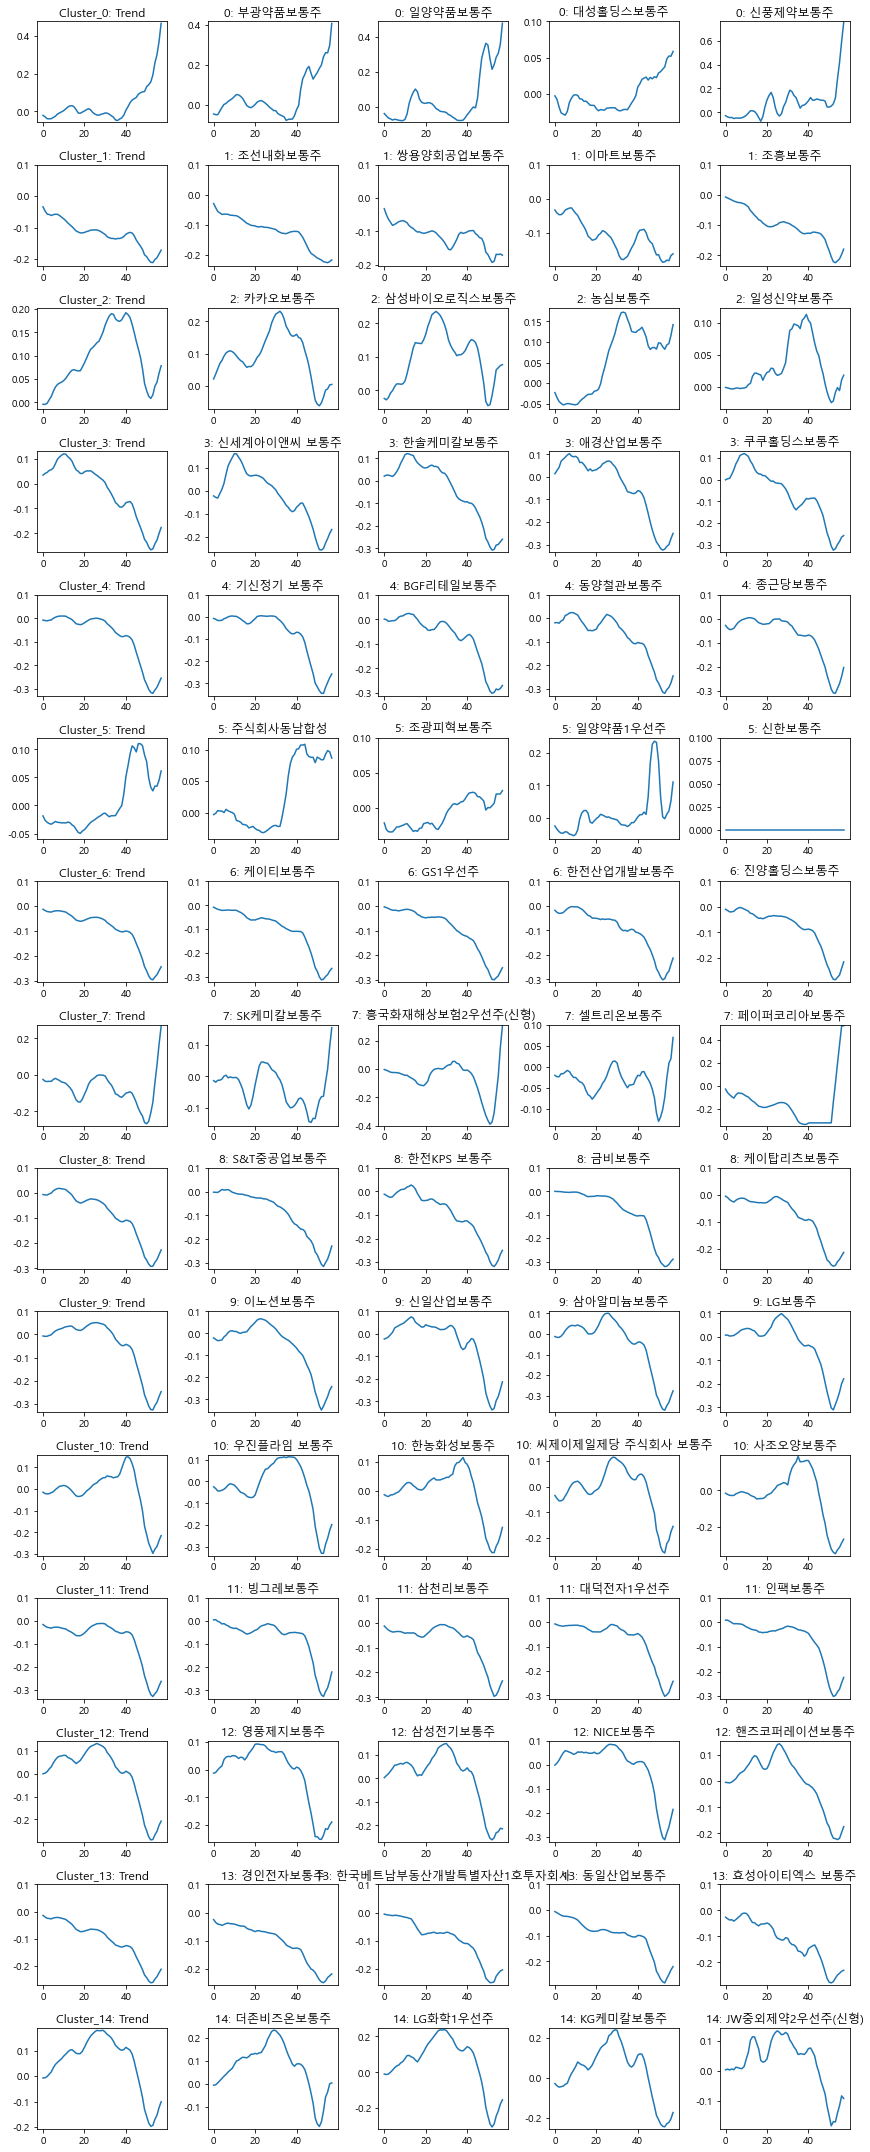

In [448]:
import matplotlib.font_manager as fm
import matplotlib
from scipy.spatial.distance import euclidean

font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = 'Malgun Gothic'
fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font_name)
matplotlib.rc('axes', unicode_minus=False)

def plot_clusters(model, X, names, k):
    %matplotlib inline
    c = 4
    fig, axes = plt.subplots(nrows=k, ncols=c+1, figsize=(c*3, k*2))

    for label in range(k):
        x = model.cluster_centers_[label]
        axes[label][0].plot(np.arange(len(x)), x)
        axes[label][0].set_title(f'Cluster_{label}: Trend')
        axes[label][0].set_ylim([min(x.min()-0.01, 0.1), max(x.max()+0.01, 0.1)])
        n = 0
        _X = X[model.labels_ == label]
        _names = names[model.labels_ == label]
        dist = [euclidean(x, _x) for _x in _X]
        idxs = np.argsort(dist)[:c]

        for x, name in zip(_X[idxs], _names[idxs]):
            n += 1
            axes[label][n].plot(np.arange(len(x)), x)
            axes[label][n].set_title(f'{label}: {name}')
            axes[label][n].set_ylim([min(x.min()-0.01, 0.1), max(x.max()+0.01, 0.1)])
            if n >= c:
                break

    plt.tight_layout()
    plt.show()

plot_clusters(kmeans_model, X, names, k)

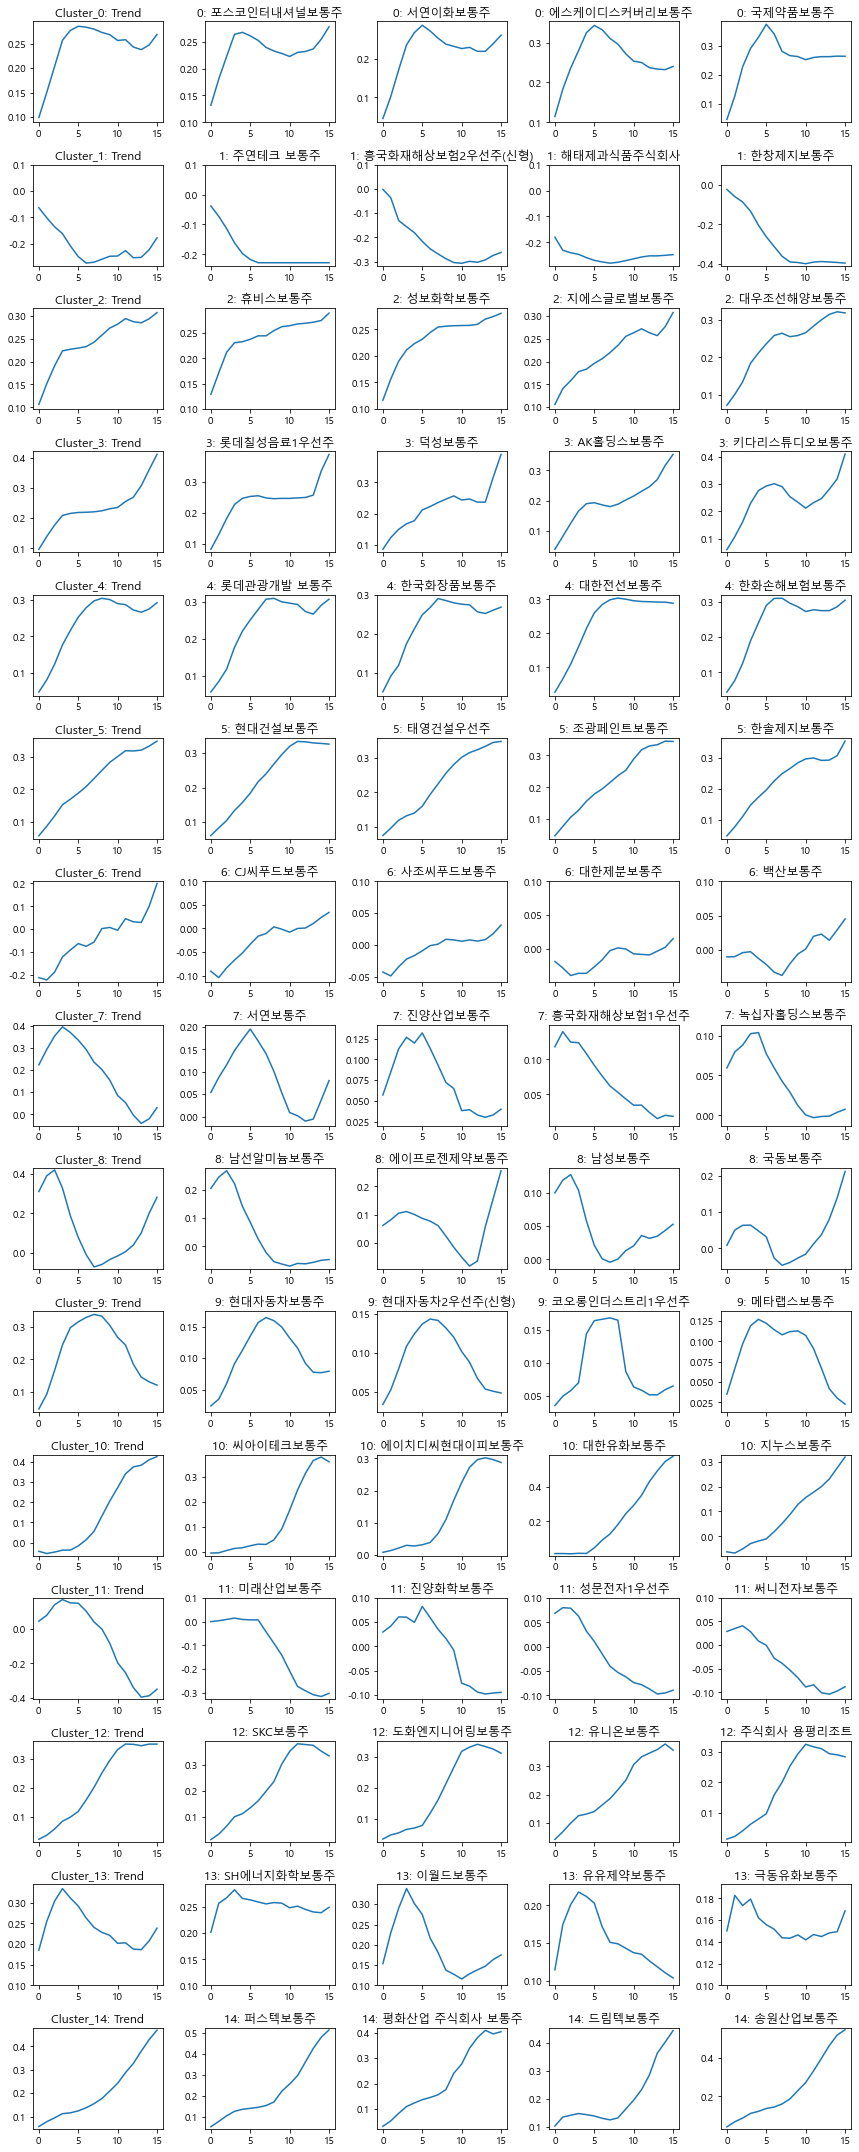

In [449]:
plot_clusters(fdr_model, fdr_X, fdr_names, k)

In [ ]:
from pycaret.clustering import *
from pycaret.datasets import get_data

In [ ]:
j = get_data('jewellery')
j

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130
...,...,...,...,...
500,28,101206,0.387441,14936.775389
501,93,19934,0.203140,17969.693769
502,90,35297,0.355149,16091.401954
503,91,20681,0.354679,18401.088445


In [ ]:
data_selected = data_2020[['거래일자', '시가', '고가', '저가', '종가', '거래량']]

In [ ]:
clu1 = setup(data=j, normalize=True)

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:48:21
Status,. . . . . . . . . . . . . . . . . .,Preparing Data for Modeling


ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.